<h1><center> Sentiment analysis of Twitter data

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
train_data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/twitter_training.csv")
validation_data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/twitter_validation.csv")

In [ ]:
print(train_data.head())

   2401  Borderlands  Positive  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

  im getting on borderlands and i will murder you all ,  
0  I am coming to the borders and I will kill you...     
1  im getting on borderlands and i will kill you ...     
2  im coming on borderlands and i will murder you...     
3  im getting on borderlands 2 and i will murder ...     
4  im getting into borderlands and i can murder y...     


In [ ]:
print(validation_data.head())

   3364   Facebook Irrelevant  \
0   352     Amazon    Neutral   
1  8312  Microsoft   Negative   
2  4371      CS-GO   Negative   
3  4433     Google    Neutral   
4  6273       FIFA   Negative   

  I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣  
0  BBC News - Amazon boss Jeff Bezos rejects clai...                                                                                                                                                                                                  
1  @Microsoft Why do I pay for WORD when it funct...                                                                                                                                                                                                  
2  CSGO matchmaking is so full of closet hacking,...        

In [ ]:
print(train_data.columns)
print(validation_data.columns)

Index(['2401', 'Borderlands', 'Positive',
       'im getting on borderlands and i will murder you all ,'],
      dtype='object')
Index(['3364', 'Facebook', 'Irrelevant',
       'I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣'],
      dtype='object')


In [ ]:
#define the headers

columns=['id','topic','sentiment','tweet']

train_data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/twitter_training.csv",names=columns)
validation_data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/twitter_validation.csv",names=columns)

print(train_data.head())
print(validation_data.head())

     id        topic sentiment  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

                                               tweet  
0  im getting on borderlands and i will murder yo...  
1  I am coming to the borders and I will kill you...  
2  im getting on borderlands and i will kill you ...  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands 2 and i will murder ...  
     id      topic   sentiment  \
0  3364   Facebook  Irrelevant   
1   352     Amazon     Neutral   
2  8312  Microsoft    Negative   
3  4371      CS-GO    Negative   
4  4433     Google     Neutral   

                                               tweet  
0  I mentioned on Facebook that I was struggling ...  
1  BBC News - Amazon boss Jeff Bezos rejects clai...  
2  @Microsoft Why do I pay for WORD when it funct...  
3  CSGO matchmaking is so full of closet

<h3>Data Preprocessing

In [ ]:
#check for null values
print(train_data.isnull().sum())
print(validation_data.isnull().sum())

id             0
topic          0
sentiment      0
tweet        686
dtype: int64
id           0
topic        0
sentiment    0
tweet        0
dtype: int64


In [ ]:
#drop the NaN tweets
train_data=train_data.dropna(subset=['tweet','sentiment'])
valdation_data=validation_data.dropna(subset=['tweet','sentiment'])

In [ ]:
#recheck for null values
print(train_data.isnull().sum())
print(validation_data.isnull().sum())

id           0
topic        0
sentiment    0
tweet        0
dtype: int64
id           0
topic        0
sentiment    0
tweet        0
dtype: int64


In [ ]:
#remove noise

import re
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords

stop_words=set(stopwords.words('english'))

def clean_text(text):
  text=re.sub(r'http\S+','',text)
  text=re.sub(r'@\w+','',text)
  text=re.sub(r'#\w+','',text)
  text=re.sub(r'\d+','',text)
  text=re.sub(r'[^\w\s]','',text)
  text=text.lower()
  text=' '.join([word for word in text.split() if word not in stop_words])
  return text

train_data.loc[:,'cleaned_tweet']=train_data['tweet'].apply(clean_text)
validation_data.loc[:,'cleaned_tweet']=validation_data['tweet'].apply(clean_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#tokenise and remove stopwords

def remove_stopwords(text):
  return ' '.join([word for word in text.split() if word not in stop_words])

train_data.loc[:,'cleaned_tweet']=train_data['cleaned_tweet'].apply(remove_stopwords)
validation_data.loc[:,'cleaned_tweet']=validation_data['cleaned_tweet'].apply(remove_stopwords)


<h3><center>Vectorize the text data

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf=TfidfVectorizer(max_features=5000)

x_train_tfidf=tfidf.fit_transform(train_data['cleaned_tweet']).toarray()
x_val_tfidf=tfidf.transform(validation_data['cleaned_tweet']).toarray()

y_train=train_data['sentiment']
y_val=validation_data['sentiment']

<h3><center>Build a Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report

lr=LogisticRegression(max_iter=10000)
lr.fit(x_train_tfidf,y_train)


y_pred=lr.predict(x_val_tfidf)

print("Accuracy: ",accuracy_score(y_val,y_pred))
print("Classification Report: ",classification_report(y_val,y_pred))

Accuracy:  0.804
Classification Report:                precision    recall  f1-score   support

  Irrelevant       0.79      0.69      0.74       172
    Negative       0.75      0.88      0.81       266
     Neutral       0.87      0.74      0.80       285
    Positive       0.82      0.87      0.84       277

    accuracy                           0.80      1000
   macro avg       0.81      0.79      0.80      1000
weighted avg       0.81      0.80      0.80      1000



<h3><center>Sentiment Distribution Bar Plot

<ipython-input-23-92ee699cbc22>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index,y=sentiment_counts.values,hue=None,legend=False,palette="viridis")


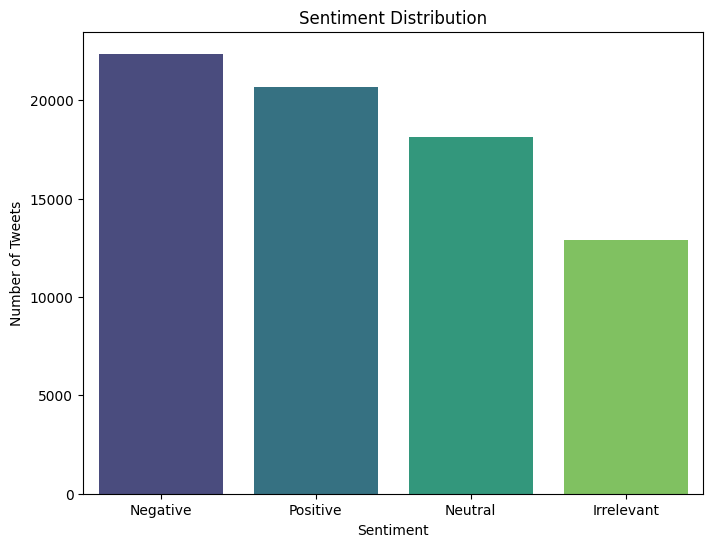

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sentiment_counts = train_data['sentiment'].value_counts()

plt.figure(figsize=(8,6))
sns.barplot(x=sentiment_counts.index,y=sentiment_counts.values,hue=None,legend=False,palette="viridis")
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Number of Tweets")
plt.show()

<h3><center>Word Cloud for Each Sentiment

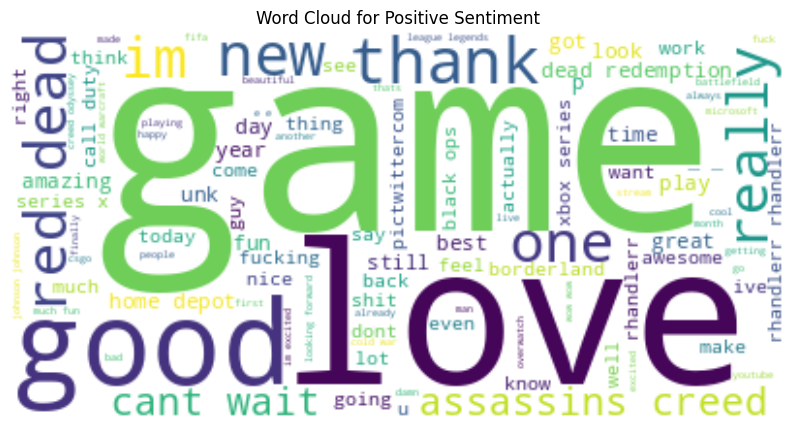

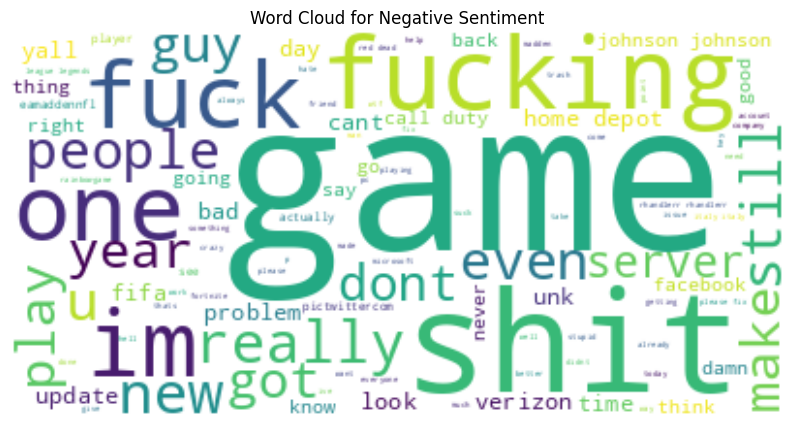

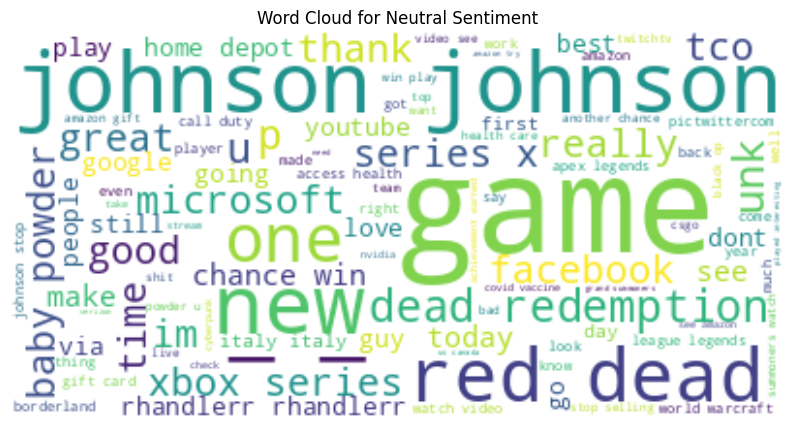

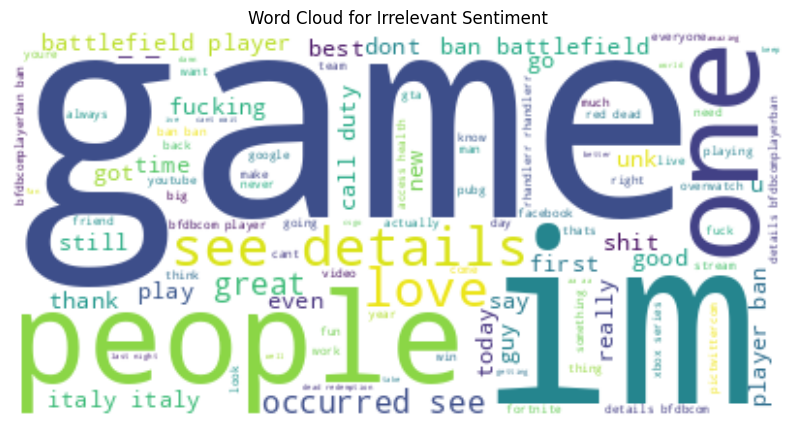

In [ ]:
from wordcloud import WordCloud

def plot_wordcloud(data,sentiment):
  text=" ".join(tweet for tweet in data[data['sentiment']==sentiment]['cleaned_tweet'])
  wordcloud = WordCloud(max_words=100,background_color="white").generate(text)

  plt.figure(figsize=(10,6))
  plt.imshow(wordcloud,interpolation="bilinear")
  plt.axis("off")
  plt.title(f"Word Cloud for {sentiment} Sentiment")
  plt.show()

plot_wordcloud(train_data,"Positive")
plot_wordcloud(train_data,"Negative")
plot_wordcloud(train_data,"Neutral")
plot_wordcloud(train_data,"Irrelevant")